In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [3]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("Linear_svc",LinearSVC(C=1,loss="hinge")),
])
svm_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [6]:
X,y = make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [7]:
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], xlabel="$x_1$", ylabel="$x_2$"):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    custom_cmap = plt.cm.brg
    plt.contourf(x0, x1, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.plot(X[y==0][:, 0], X[y==0][:, 1], "bs")
    plt.plot(X[y==1][:, 0], X[y==1][:, 1], "g^")
    plt.axis(axes)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)

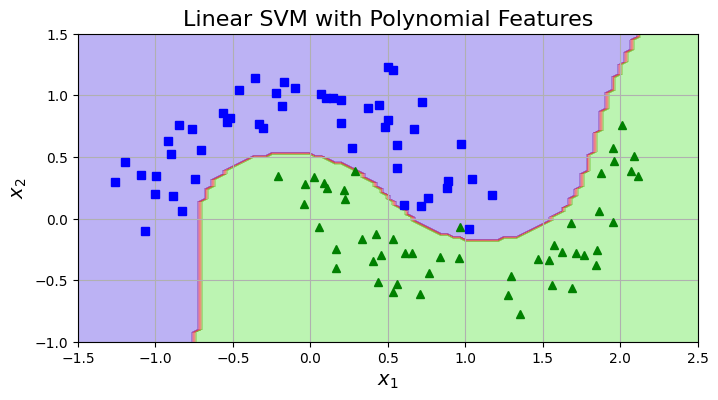

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(polynomial_svm_clf, X, y)
plt.title("Linear SVM with Polynomial Features", fontsize=16)
plt.show()

In [9]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

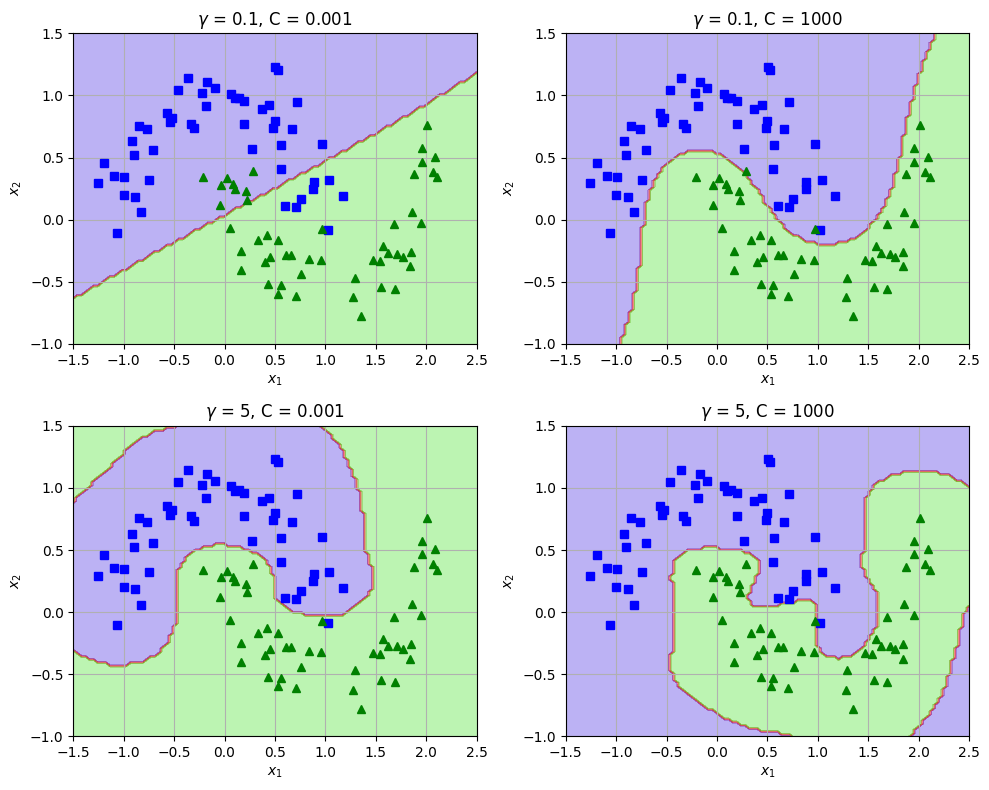

In [11]:
def plot_svm_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
    plt.plot(X[y==0][:, 0], X[y==0][:, 1], "bs")
    plt.plot(X[y==1][:, 0], X[y==1][:, 1], "g^")
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)

gamma_values = [0.1, 5]
C_values = [0.001, 1000]
axes = [-1.5, 2.5, -1.0, 1.5]

plt.figure(figsize=(10, 8))
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        plt.subplot(2, 2, i*2 + j + 1)
        svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
        svm_clf.fit(X, y)
        plot_svm_decision_boundary(svm_clf, X, y, axes)
        plt.title(f"$\gamma$ = {gamma}, C = {C}")

plt.tight_layout()
plt.show()
